In [1]:
# modules import
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean

In [2]:
## Open Data

# ice shelf mask
netCDF_mask_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/isf_mask_AMUXL025_BedMachineAntarctica-2020-07-15_v02.nc'
Mask = xr.open_mfdataset(netCDF_mask_file) 
Mask = Mask.rename_dims({'lat' : 'y', 'lon' : 'x'}) # change name (lat,lon in x,y)
Mask_final = xr.where(Mask.isfmask > 1, 1000, Mask) # 1000 for icesheves
Mask_final = xr.where(Mask.isfmask < 0, 0, Mask_final) # 0 instead
data1 = np.array(Mask_final['isfmask'].where(Mask.isfmask >1)) # for plotting iceshelves
data2 = Mask_final.isfmask.where(Mask_final.isfmask==0) # for plotting grounded area
data3 = Mask_final.isfmask # for plotting contour

# grid file
netCDF_grid_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/mesh_mask_AMUXL025_BedMachineAntarctica-2020-07-15_v02_ICB380.nc'
Grid = xr.open_mfdataset(netCDF_grid_file).squeeze()
data4 = Grid.tmask.where(Grid.tmask ==0).isel(z=0) # for plotting icebergs

# bathymetry file
netCDF_bathy_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/bathy_meter_AMUXL025_BedMachineAntarctica-2020-07-15_v02_ICB380.nc'
bathy = xr.open_mfdataset(netCDF_bathy_file) 
data = np.array(bathy['Bathymetry_isf']) # for plotting bathymetry

# file with region of perturbed, transition and unerturbes area for wind
netCDF_wind_mask_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/mask_windy_perturbations.nc'
Mask_wind = xr.open_mfdataset(netCDF_wind_mask_file)
Mask_windy = xr.where(Mask_wind.region == 0, 10, Mask_wind) # change number to have the same color of transition area, unperturbed and perturbed area for all the mask
Mask_windy = xr.where(Mask_windy.region == 1, 0, Mask_windy)
Mask_windy = xr.where(Mask_windy.region == 10, 1, Mask_windy)
B = xr.where(Mask_windy.region==2,0.5,Mask_windy.region) # change number for colorbar
data6 = B # for plotting mask for wind perturbation

# file with region of perturbed, transition and unerturbes area for temperature and precipitations
netCDF_temp_mask_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/mask_wind_perturbations.nc'
Mask_temp = xr.open_mfdataset(netCDF_temp_mask_file)
A = xr.where(Mask_temp.region==2,0.5,Mask_temp.region) # change number for colorbar
data7 = A # for plotting mask for temperature and precipitation perturbation

# wind perturbation file (for a given longitude)
netCDF_file='/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/COMPLEMENT/zonal_wind_meanlon.nc'
wind_lat = xr.open_mfdataset(netCDF_file)


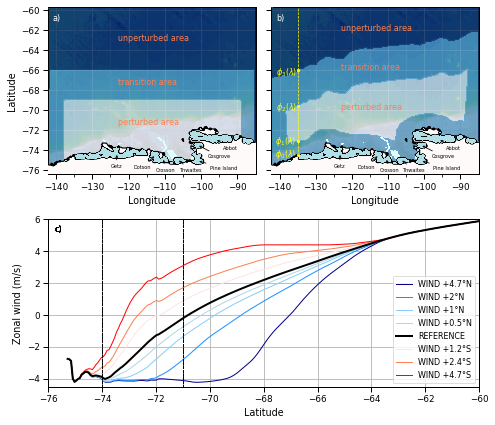

In [3]:
sns.set_context('paper')

# coordinate
X = np.array(bathy['nav_lon'])
Y = np.array(bathy['nav_lat'])

# colorbar and legend
cmap1 = cmocean.cm.dense
colors = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'mistyrose', 'coral', 'red']
b = ['WIND +4.7°N', 'WIND +2°N', 'WIND +1°N', 'WIND +0.5°N', 'REFERENCE', 'WIND +1.2°S', 'WIND +2.4°S', 'WIND +4.7°S']

# point for phi legend
xphi = np.array([-135, -135, -135, -135])
yphi = np.array([-74.5, -73.1, -69.6, -66])

## figure
f = plt.figure(figsize = (7.09, 6))
ax={}
nb_rows = 2
nb_cols = 2

# graphe b - mask for wind perturbation
k=2
ax[k] = f.add_subplot(nb_rows,nb_cols, k)
cax = ax[k].contourf(X, Y, data, vmin = 0, vmax=6000, levels = 26,  cmap='gist_earth_r', zorder=1,) # add bathymetry
cax1 = ax[k].contourf(X, Y, data1,  colors = 'powderblue', zorder=6) # add iceshelves
cax2 = ax[k].contourf(X, Y, data4,  colors = 'lightcyan', zorder=3) # add icebergs
cax2 = ax[k].contourf(X, Y, data2,  colors = 'snow', zorder=4) # add grounded area
cax3 = ax[k].contour(X, Y, data3, colors = 'black', zorder=5) # add contour
cax6 = ax[k].contourf(X, Y, data6, vmin = 0, vmax=1, levels = 2, alpha = 0.75, zorder=2, cmap='Blues') # add mask for perturbation of wind
cax7 = ax[k].scatter(xphi, yphi, s= 6, c='yellow', zorder = 7) # add legend phi

# add text
ax[k].annotate('Getz', xy=(-123.2, -74.3), xytext=(-125, -75.8), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Dotson', xy=(-112.5, -74.5), xytext=(-118.5, -75.9), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Crosson', xy=(-110.5, -74.8), xytext=(-112.4, -76.15), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Thwaites', xy=(-106.5, -74.95), xytext=(-106, -76.15), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Pine Island', xy=(-101, -75.1), xytext=(-97.5, -75.95), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Cosgrove', xy=(-101, -73.5), xytext=(-98, -74.8), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Abbot', xy=(-96, -72.9), xytext=(-94, -74), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)

# add label
majorx_ticks = np.arange(-150, -80, 10)
minorx_ticks = np.arange(-145, -85, 10)
ax[k].set_xticks(majorx_ticks)
ax[k].set_xticks(minorx_ticks, minor=True)
ax[k].grid(which='both')
ax[k].grid(which='minor', alpha=0.4)
ax[k].grid(which='major', alpha=0.8)
ax[k].set_xlim(bathy['nav_lon'].min(), bathy['nav_lon'].max())
ax[k].set_xlabel('Longitude')
ax[k].axes.yaxis.set_ticklabels([]) 
ax[k].text(-123, -62, 'unperturbed area', fontsize=8, color = 'coral')
ax[k].text(-123, -66, 'transition area', fontsize=8, color = 'coral')
ax[k].text(-123, -70, 'perturbed area', fontsize=8, color = 'coral')
ax[k].text(-141, -61, 'b)', fontsize=8, color = 'white')
plt.axvline(-135,linewidth = 0.7, linestyle='--', color='yellow')
ax[k].text(-141.3, -74.7, '$\phi_0(\lambda)$', fontsize=8, color = 'yellow')
ax[k].text(-141.3, -73.4, '$\phi_1(\lambda)$', fontsize=8, color = 'yellow')
ax[k].text(-141., -70, '$\phi_2(\lambda)$', fontsize=8, color = 'yellow')
ax[k].text(-141, -66.5, '$\phi_3(\lambda)$', fontsize=8, color = 'yellow', zorder = 12)

# graphe a - mask for temperature and precipitation perturbation
k=1
ax[k] = f.add_subplot(nb_rows,nb_cols, k)
cax = ax[k].contourf(X, Y, data, vmin = 0, vmax=6000, levels = 26,  cmap='gist_earth_r', zorder=1,) # add bathymetry
cax1 = ax[k].contourf(X, Y, data1,  colors = 'powderblue', zorder=6) # add iceshelves
cax2 = ax[k].contourf(X, Y, data4,  colors = 'lightcyan', zorder=3) # add iceberg
cax2 = cax3 = ax[k].contour(X, Y, data3, colors = 'black', zorder=5) # add contour
ax[k].contourf(X, Y, data2,  colors = 'snow', zorder=4) # add grounded area
cax6 = ax[k].contourf(X, Y, data7, vmin = 0, vmax=1, levels = 2, alpha = 0.75, zorder=2 , cmap='Blues') # add mask for perturbation of precipitation and temperature

# add text
ax[k].annotate('Getz', xy=(-123.2, -74.3), xytext=(-125, -75.8), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Dotson', xy=(-112.5, -74.5), xytext=(-118.5, -75.9), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Crosson', xy=(-110.5, -74.8), xytext=(-112.4, -76.15), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Thwaites', xy=(-106.5, -74.95), xytext=(-106, -76.15), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Pine Island', xy=(-101, -75.1), xytext=(-97.5, -75.95), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Cosgrove', xy=(-101, -73.5), xytext=(-98, -74.8), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Abbot', xy=(-96, -72.9), xytext=(-94, -74), fontsize=5, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].text(-123, -63, 'unperturbed area', fontsize=8, color = 'coral')
ax[k].text(-123, -67.5, 'transition area', fontsize=8, color = 'coral')
ax[k].text(-123, -71.5, 'perturbed area', fontsize=8, color = 'coral')
ax[k].text(-141, -61, 'a)', fontsize=8, color = 'white')

# add label
majorx_ticks = np.arange(-150, -80, 10)
minorx_ticks = np.arange(-145, -85, 10)
ax[k].set_xticks(majorx_ticks)
ax[k].set_xticks(minorx_ticks, minor=True)
ax[k].grid(which='both')
ax[k].grid(which='minor', alpha=0.4)
ax[k].grid(which='major', alpha=0.8)
ax[k].set_xlim(bathy['nav_lon'].min(), bathy['nav_lon'].max())
ax[k].set_xlabel('Longitude')
ax[k].set_ylabel('Latitude')

# graphe c - wind perturbation as a fonction of latitude
k=3
ax[k] = f.add_subplot(nb_rows,1,2)
for j in np.arange(0, wind_lat['num'].size, 1):
    TOT1 = wind_lat.uas[:, j]
    if colors[j]=='black':
        ax[k].plot(TOT1.lat, TOT1, linewidth = 2, color= colors[j], label = b[j], zorder=9) # the reference line is thicker
    else:
        ax[k].plot(TOT1.lat, TOT1, linewidth = 1, color= colors[j], label = b[j])
#add label
    ax[k].set_xlabel('Latitude')
    ax[k].set_ylabel('Zonal wind (m/s)')
    ax[k].set_ylim(-4.5,6)
    ax[k].set_xlim(-76,-60)
    ax[k].text(-75.75, 5.2, 'c)', fontsize=8, color = 'black')
    plt.axvline(x=-71,linewidth = 0.7, linestyle='--',color='black')
    plt.axvline(x=-74,linewidth = 0.7, linestyle='--',color='black')
    plt.grid(True)
    plt.legend(loc = 'lower right', prop={"size":8})
    
plt.tight_layout()
#save figure
plt.savefig('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/perturb_wind_total.pdf')
